# Analisis del problema
El objetivo de este proyecto es predecir las ventas de la compañía Rossmann. Rossmann es una cadena de tiendas que opera en varios países y, como cualquier empresa, busca maximizar sus ingresos y optimizar sus operaciones. Para lograr esto, es crucial poder predecir las ventas futuras con precisión.


# Entendimiento de los datos

`Store`: Integer - Identificador único para cada tienda.

`DayOfWeek`: Integer - Día de la semana (1 = lunes, 7 = domingo).

`Date`: Datetime - Fecha de la observación.

`Sales`: Integer - Ventas totales para la tienda en esa fecha.

`Customers`: Integer - Número de clientes que visitaron la tienda en esa fecha.

`Open`: Integer - Indica si la tienda estaba abierta (1) o cerrada (0).

`Promo`: Integer - Indica si hubo una promoción (1) o no (0).

`StateHoliday`: String - Indica si el día fue un día festivo estatal (categoría).

`SchoolHoliday`: Integer - Indica si fue un día de vacaciones escolares (1 = sí, 0 = no).


# Exploración de los datos

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargar datos de entrenamiento
dtype_dict = {
    'StateHoliday': str,
}
train_file_path = '../datasets/rossman.csv'  
train_data = pd.read_csv(train_file_path, dtype=dtype_dict)

train_data = train_data[train_data['Store'] == 2]

train_data["Date"]=pd.to_datetime(train_data["Date"])
train_data["Sales"]=pd.to_numeric(train_data["Sales"], downcast='float')

print(train_data.shape)
print(train_data.head(5))

(942, 9)
      Store  DayOfWeek       Date   Sales  Customers  Open  Promo  \
1         2          5 2015-07-31  6064.0        625     1      1   
1116      2          4 2015-07-30  5567.0        601     1      1   
2231      2          3 2015-07-29  6402.0        727     1      1   
3346      2          2 2015-07-28  5671.0        646     1      1   
4461      2          1 2015-07-27  6627.0        638     1      1   

     StateHoliday  SchoolHoliday  
1               0              1  
1116            0              1  
2231            0              1  
3346            0              1  
4461            0              1  


             Sales
Date              
2013-01-01     0.0
2013-01-02  4422.0
2013-01-03  4159.0
2013-01-04  4484.0
2013-01-05  2342.0


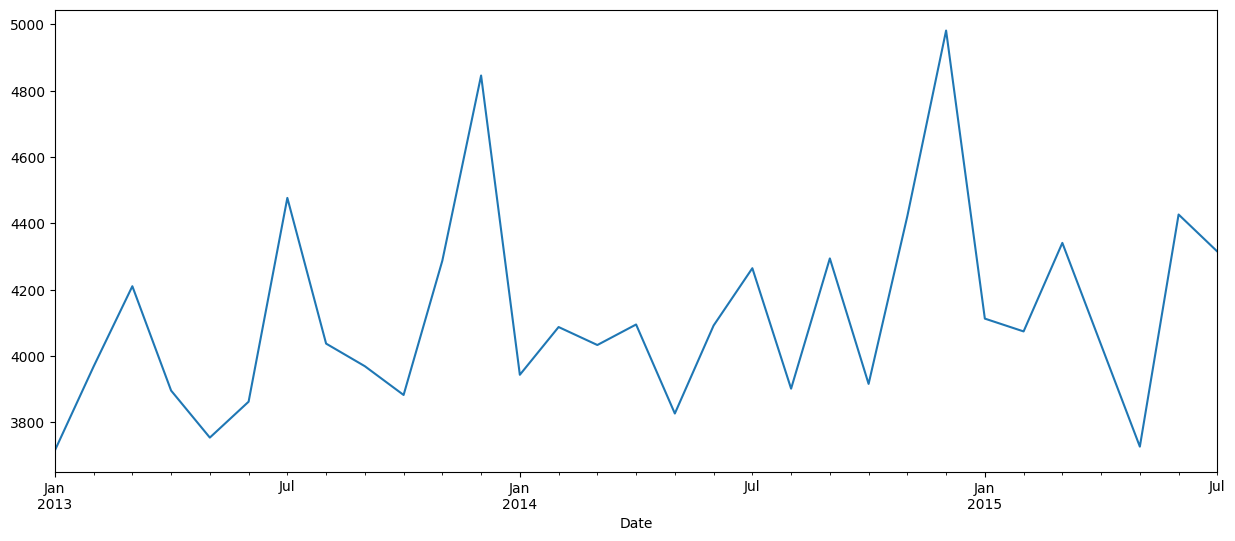

In [4]:
train_data = train_data.sort_values(by='Date')
train_data = train_data.groupby('Date')['Sales'].sum().reset_index()
train_data = train_data.set_index('Date')
print(train_data.head(5))

y = train_data['Sales'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Modelo Machine Learning

In [6]:
# Find best parameters
bestAIC = np.inf
bestParms = None
bestSeasonalParms = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit(disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < bestAIC:
                bestAIC = results.aic
                bestParms = param
                bestSeasonalParms = param_seasonal
        except:
            continue

print('Best ARIMA{}x{}12 - AIC:{}'.format(bestParms, bestSeasonalParms, bestAIC))


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:586.9306692374153
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:332.9649547985755
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:240.58764442130644
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:84.16366074736814
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:252.08076714231683
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:240.8262742668493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:97.20160019570062
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:84.62988631920854
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:549.1377335422217
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:297.5719928035142
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:229.65567982939422
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:73.60901781883229
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:254.73824801231925
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:225.83952466618396
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:98.42357775726292
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:72.64469662747004
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:432.64236598486525
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:252.93055836596952
ARI

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      2.601     -0.384      0.701      -6.098       4.098
ma.S.L12       0.3115      1.193      0.261      0.794      -2.026       2.649
sigma2      2.743e+04   9.49e-05   2.89e+08      0.000    2.74e+04    2.74e+04


# Evaluaciones

In [ ]:

pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Si doy una fecha en específico, ¿cómo puedo obtener la predicción?
forecasted_date = '2016-01-01'
forecast = results.get_forecast(steps=100)
forecast_ci = forecast.conf_int()
forecasted_sales = forecast.predicted_mean[forecasted_date]
print(f'La predicción de ventas para la fecha {forecasted_date} es: {forecasted_sales}')

# Resultados
Los resultados del ajuste del modelo SARIMA muestran que los coeficientes para los términos de media móvil son los siguientes:

ma.L1: Tiene un coeficiente de -1.0000 con un valor p de 0.701, lo que indica que no es significativo. Esto sugiere que este término no contribuye de manera significativa al modelo.
ma.S.L12: Tiene un coeficiente de 0.3115 con un valor p de 0.794, también indicando que no es significativo en el contexto del modelo.
sigma2: El valor de 2.743e+04 sugiere que hay una considerable varianza en los errores del modelo. Sin embargo, este valor es extremadamente alto, lo que podría indicar que el modelo no está capturando adecuadamente la variabilidad en los datos.
Conclusión sobre la Utilidad del Modelo

Dado que ambos coeficientes de los términos de media móvil (ma.L1 y ma.S.L12) no son significativos y que la varianza de los errores es alta, el modelo SARIMA ajustado puede no ser útil para hacer predicciones precisas. Es recomendable reconsiderar los parámetros del modelo o explorar otros enfoques, como ajustar los órdenes de los términos ARIMA o probar modelos alternativos, para mejorar el rendimiento de la predicción.